### Демонстрация работы алгоритма поиска решения задачи оптимального управления

$$ J(u, x) = \int_0^T{f_0(x, u, t)}dt + \Phi(x(T))$$
$$ \frac{dx}{dt} = f(x, u, t), \quad x(T) = x_T $$


Ниже представлен результат работы **2-х различных алгоритмов**:
*  С помощью уравнения Гамильтона-Понтрягина. Этот метод работает **только** для **специфичного** указанного в коде вида функционалов $f_0$, $f$ и $\Phi$, т.е. решает **очень узкий** клас задач.
*  С помощью Алгоритма Динамического программирования для непрерывного случая. Данный метод работает **для произвольного, заданого пользователем** вида $f_0, f$ и $\Phi$, единственное ограничение -- $f$ должен иметь вид: $f(x, u, t) = F(t, x) + u$. Данный алгоритм решает задачу для **произвольных непрерывных равномерных** $f_0, f, \Phi$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d
from ct import solve_control_problem, bellman_dynamic_general

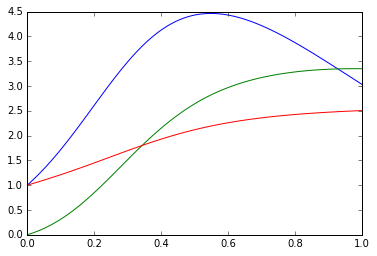

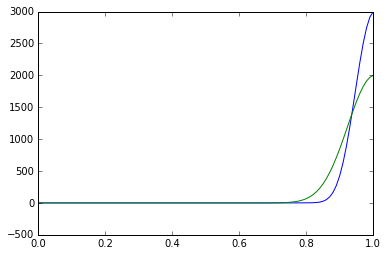

In [2]:
def a1(s):
    return 3*math.cos(1.5*s)

def b1(s):
    return 2*math.sin(s)

def a2(s):
    return 1

def b2(s):
    return 1

solve_control_problem(1.0, 0.01, a1, b1, a2, b2, 1, 1, 3000, 2000)

begin
calculate bellman for T_{n-1}
from T_{n-2} to T_{0}
find first point:
find other points:


/home/falcon/Workspace/control-theory/ct.py:278: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  next_i = optimal_next_index[t][i]


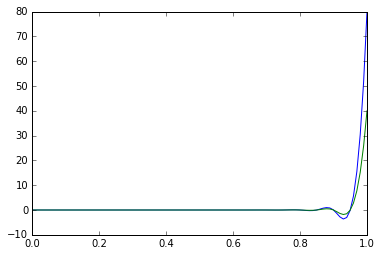

In [3]:
def a1(s):
    return 3*math.cos(1.5*s)

def b1(s):
    return 2*math.sin(s)

def a2(s):
    return 1

def b2(s):
    return 1

def f0(g, n, t):
    assert g.shape == n.shape == (2, )
    return (n[0])**2 + (n[1])**2 +(g[0])**2 + (g[1])**2

def f(t, n):
    assert n.shape == (2, )
    return np.array([a1(t)*n[0] + b2(t)*n[1], b1(t)*n[0] + a2(t)*n[1], ])

def phi(n):
    assert n.shape == (2, )
    return n[0]**2 + n[1]**2

vn1, vn2 = np.arange(0, 100, 10), np.arange(0, 100, 10)
vn = []
for n1 in vn1:
    for n2 in vn2:
        vn.append(np.array([n1, n2], dtype=np.float_)) 

None
vn = np.array(vn)

vt = np.arange(0, 1+0.05, 0.05)
n_T = np.array([80, 40])


bellman_dynamic_general(f0, f, phi, vt, vn, n_T)